In [134]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv("D:\\Final\\train.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [136]:
df.shape

(45211, 11)

In [137]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [138]:
num_var = df[['age', 'day', 'dur', 'num_calls']]
cat_var = df[['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome','y']]
tar_var = df[['y']]

In [139]:
## Clean
# Missing values - NO
# outliers - clipped
# data in right format -yes
# duplicates -removed
# Structured data -yes

check missing data

One of the main steps in data preprocessing is handling missing data. Missing data means absence of observations in columns that can be caused while procuring the data, lack of information, incomplete results etc. Feeding missing data to your machine learning model could lead to wrong prediction or classification. Hence it is necessary to identify missing values and treat them.

In [140]:
df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [141]:
df = df.drop_duplicates()
df.shape

(45205, 11)

In [142]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [143]:
list = ['age','day','dur','num_calls']
for col in list:
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_threshold = df[col].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[col].quantile(0.75) - (1.5 * iqr)
    df[col] = df[col].clip(lower_threshold,upper_threshold)

In [144]:
df['age'].describe()

count    45205.000000
mean        40.927032
std         10.299428
min         25.500000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

In [145]:
df.groupby('y')['age'].mean()

y
no     40.845137
yes    41.545094
Name: age, dtype: float64

In [146]:
df['y'] = df['y'].map({'yes': 0, 'no': 1})

In [147]:
df['job'].dtype

dtype('O')

In [148]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

<Axes: xlabel='job'>

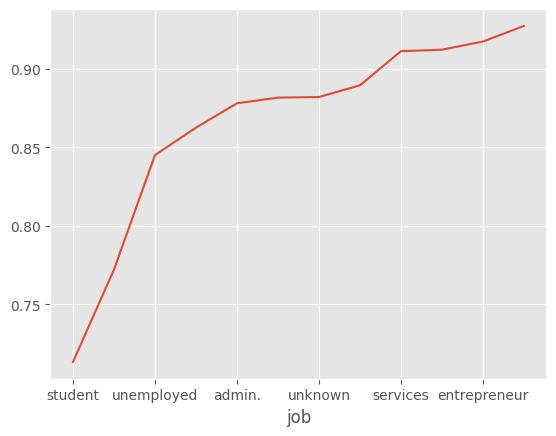

In [149]:
df.groupby('job')['y'].mean().sort_values().plot()

In [150]:
df['job'] = df['job'].map({'student':1,'retired':2,'unemployed':3,'management':4,'admin.':5,'self-employed':6,'unknown':7,'technician':8,'services':9,'housemaid':10,'entrepreneur':11,'blue-collar':12})

In [151]:
df['job'].unique()

array([ 4,  8, 11, 12,  7,  2,  5,  9,  6,  3, 10,  1], dtype=int64)

In [152]:
df['marital'].dtype

dtype('O')

In [153]:
df.groupby('marital')['y'].mean().sort_values()

marital
single      0.850485
divorced    0.880545
married     0.898750
Name: y, dtype: float64

In [154]:
df['marital'] = df['marital'].map({'single':3,'divorced':2,'married':1})

In [155]:
df['marital'].unique()

array([1, 3, 2], dtype=int64)

In [156]:
df['education_qual'].dtype

dtype('O')

In [157]:
df.groupby('education_qual')['y'].mean().sort_values()

education_qual
tertiary     0.849914
unknown      0.864297
secondary    0.894392
primary      0.913723
Name: y, dtype: float64

In [158]:
df['education_qual'] = df['education_qual'].map({'tertiary':4,'unknown':3,'secondary':2,'primary':1})

In [159]:
df['education_qual'].unique()

array([4, 2, 3, 1], dtype=int64)

In [160]:
df['call_type'].dtype

dtype('O')

In [161]:
df.groupby('call_type')['y'].mean().sort_values()

call_type
cellular     0.850796
telephone    0.865795
unknown      0.959284
Name: y, dtype: float64

In [162]:
df['call_type'] = df['call_type'].map({'cellular':3,'telephone':2,'unknown':1})

In [163]:
df['call_type'].unique()

array([1, 3, 2], dtype=int64)

In [164]:
df['day'].describe()

count    45205.000000
mean        15.810441
std          8.316108
min          1.500000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [165]:
df.groupby('y')['day'].mean()

y
0    15.166761
1    15.895731
Name: day, dtype: float64

In [166]:
df['mon'].dtype

dtype('O')

In [167]:
df.groupby('mon')['y'].mean().sort_values()

mon
mar    0.480084
dec    0.532710
sep    0.535406
oct    0.562331
apr    0.803206
feb    0.833522
aug    0.889832
jun    0.897734
nov    0.898489
jan    0.898788
jul    0.909051
may    0.932801
Name: y, dtype: float64

In [168]:
df['mon'] = df['mon'].map({'mar':12,'dec':11,'sep':10,'oct':9,'apr':8,'feb':7,'aug':6,'jun':5,'nov':4,'jan':3,'jul':2,'may':1})

In [169]:
df['mon'].unique()

array([ 1,  5,  2,  6,  9,  4, 11,  3,  7, 12,  8, 10], dtype=int64)

In [170]:
df['dur'].describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

In [171]:
df.groupby('y')['dur'].mean()

y
0    424.640953
1    209.822352
Name: dur, dtype: float64

In [172]:
df['num_calls'].describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

In [173]:
df.groupby('y')['num_calls'].mean()

y
0    2.022689
1    2.441202
Name: num_calls, dtype: float64

In [174]:
df['prev_outcome'].dtype

dtype('O')

In [175]:
df.groupby('prev_outcome')['y'].mean().sort_values()

prev_outcome
success    0.352747
other      0.833152
failure    0.873903
unknown    0.908370
Name: y, dtype: float64

In [176]:
df['prev_outcome'] = df['prev_outcome'].map({'unknown':4,'failure':3,'other':2,'success':1})

In [177]:
df['prev_outcome'].unique()

array([4, 3, 2, 1], dtype=int64)

In [178]:
df.y.value_counts() / df.shape[0]

y
1    0.883
0    0.117
Name: count, dtype: float64

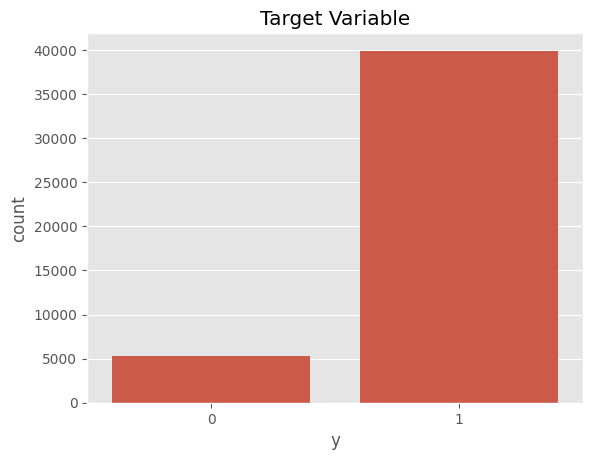

In [179]:
sns.countplot(x="y", data=df)
plt.title("Target Variable")
plt.show()

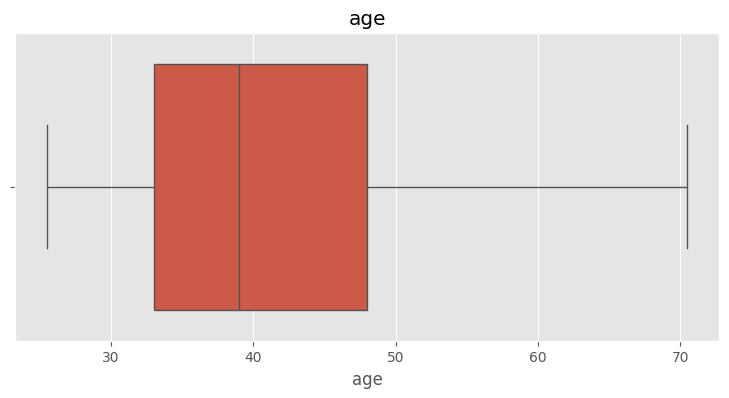

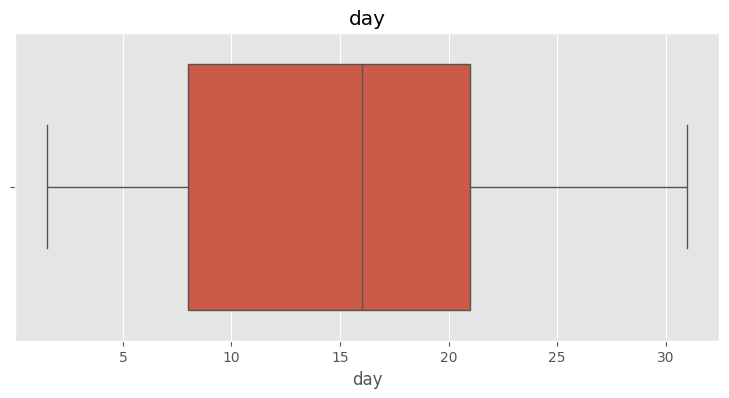

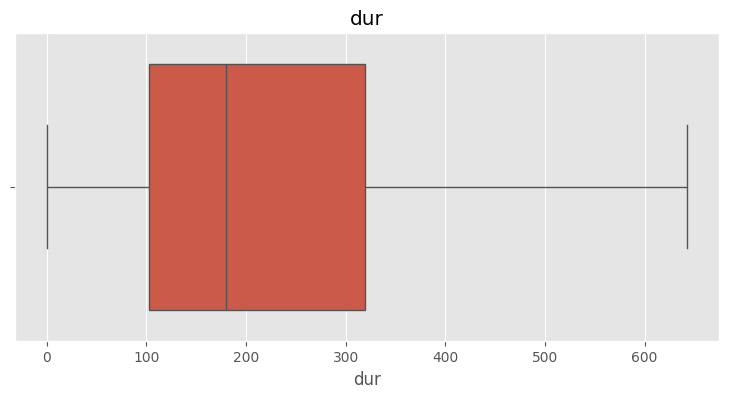

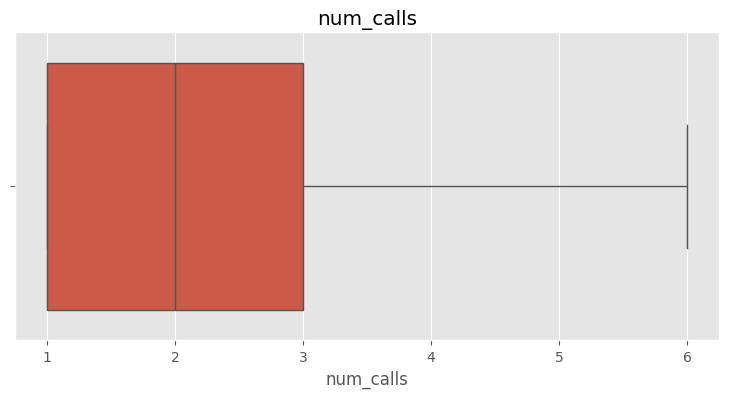

In [180]:
plt.style.use('ggplot')
for column in num_var.columns:
  plt.figure(figsize=(20,4))
  ax = plt.subplot(121)
  sns.boxplot(data=df, x=column)
  plt.title(column)

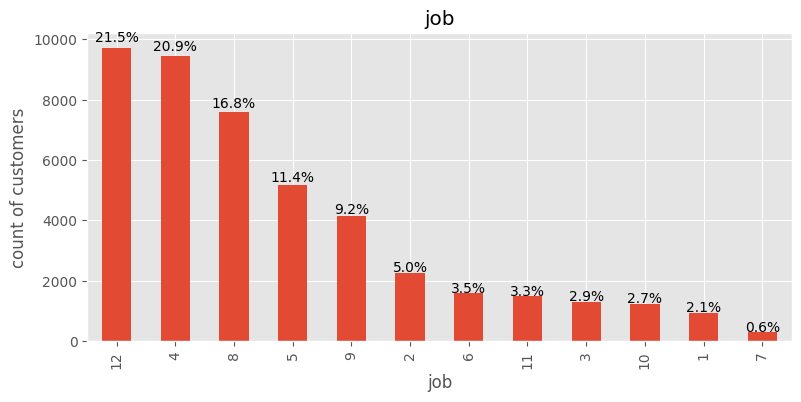

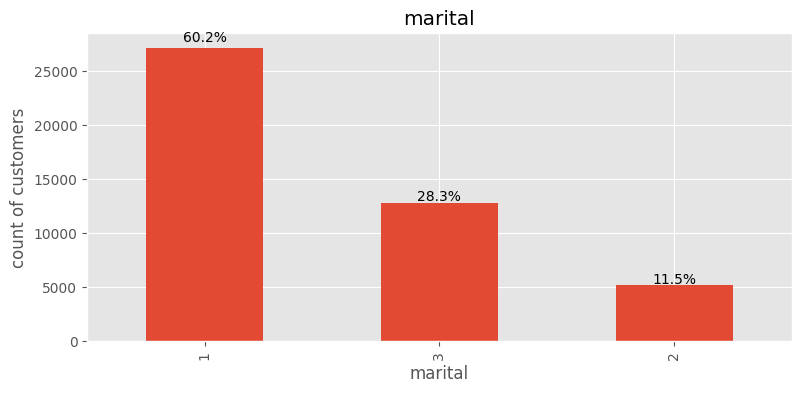

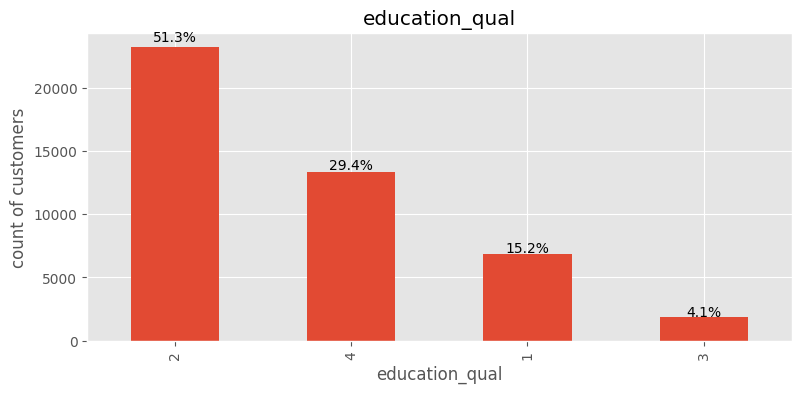

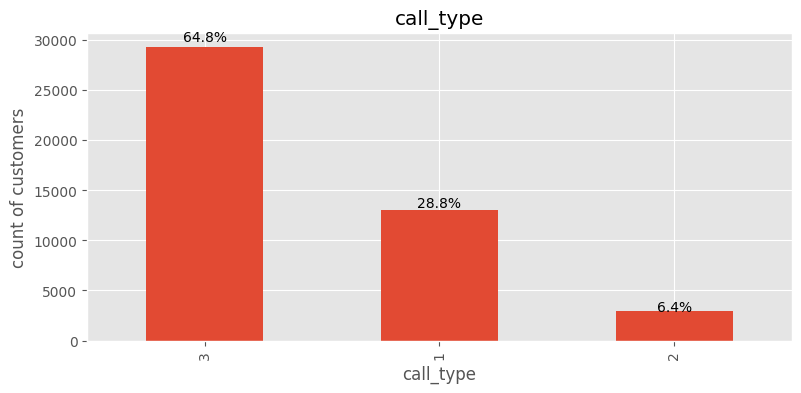

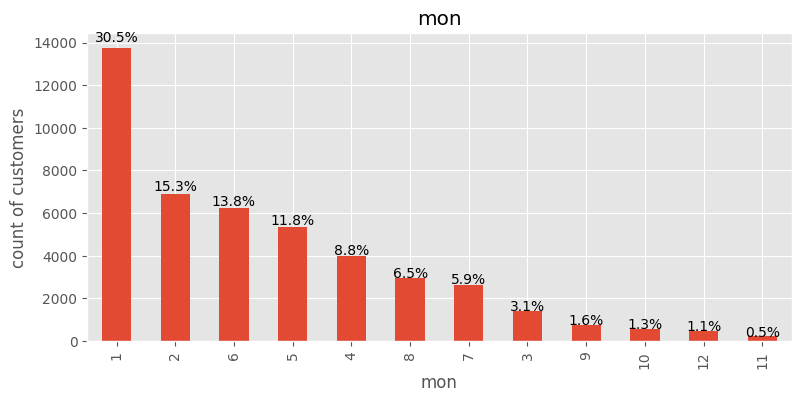

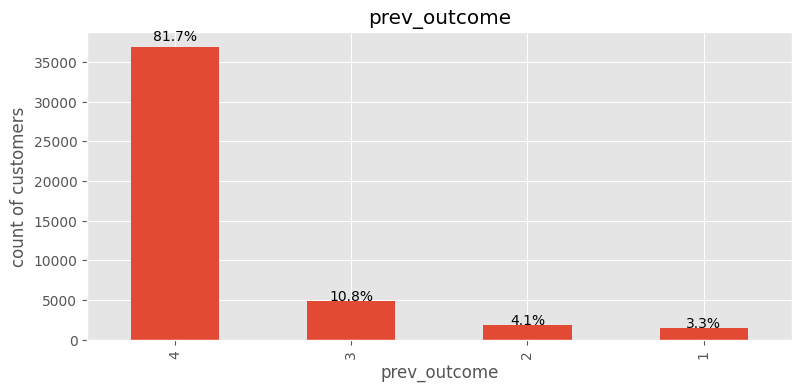

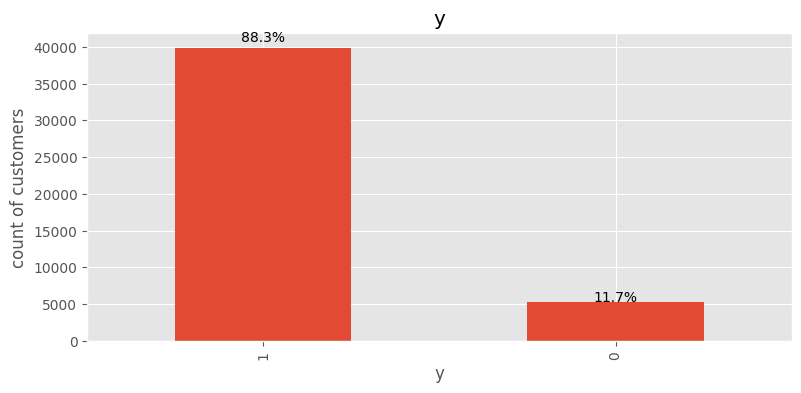

In [181]:
import matplotlib.pyplot as plt

for column in cat_var:
  plt.figure(figsize=(20,4))
  ax = plt.subplot(121)
  df[column].value_counts().plot(kind='bar')
  plt.xlabel(column)
  plt.ylabel('count of customers')
  plt.title(column)

  total = sum([p.get_height() for p in ax.patches])
  for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    ax.annotate(f'{height/total:.1%}', (x+ width/2, y + height*1.02), ha = 'center')

In [182]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,4,1,4,1,5.0,1,261,1,4,1
1,44.0,8,3,2,1,5.0,1,151,1,4,1
2,33.0,11,1,2,1,5.0,1,76,1,4,1
3,47.0,12,1,3,1,5.0,1,92,1,4,1
4,33.0,7,3,3,1,5.0,1,198,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,8,1,4,3,17.0,4,643,3,4,0
45207,70.5,2,2,1,3,17.0,4,456,2,4,0
45208,70.5,2,1,2,3,17.0,4,643,5,1,0
45209,57.0,12,1,2,2,17.0,4,508,4,4,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'job'}>,
        <Axes: title={'center': 'marital'}>],
       [<Axes: title={'center': 'education_qual'}>,
        <Axes: title={'center': 'call_type'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'mon'}>, <Axes: title={'center': 'dur'}>,
        <Axes: title={'center': 'num_calls'}>],
       [<Axes: title={'center': 'prev_outcome'}>,
        <Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

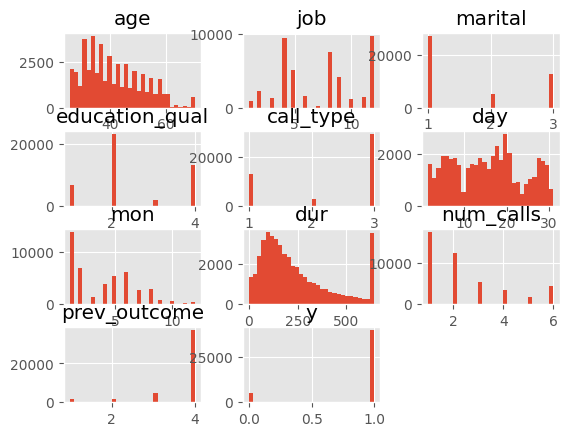

In [183]:
df.hist(bins=30)

In [184]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns[:-1]]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

In [185]:
X_train.shape, X_test.shape

((33903, 10), (11302, 10))

In [186]:
y_train.mean(), y_test.mean()

(0.8821048284812554, 0.8856839497434082)

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
#Without balancing - lets fit the model (F1 Score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

f1_score(y_test, model.predict(X_test)), model.score(X_test, y_test)

(0.9270885568147628, 0.8713502035038047)

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10]:
  model = DecisionTreeClassifier(max_depth = depth)
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Depth: {depth}, Cross-Val Score: {cross_score}")


model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Depth: 1, Cross-Val Score: 0.8821048341566998
Depth: 2, Cross-Val Score: 0.8904822934907515
Depth: 3, Cross-Val Score: 0.8968826644188287
Depth: 4, Cross-Val Score: 0.8982099240658726
Depth: 5, Cross-Val Score: 0.898711285904298
Depth: 6, Cross-Val Score: 0.8997142270577418
Depth: 7, Cross-Val Score: 0.8974429798120829
Depth: 8, Cross-Val Score: 0.8972366380206498
Depth: 9, Cross-Val Score: 0.8961453317779409
Depth: 10, Cross-Val Score: 0.8948770169866617
Test data accuracy : 0.903822332330561, F1-Score: 0.9469264196084175


In [190]:
#Balance Data - Cluster Centroid Undersampling
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=7)

X_train_cc, y_train_cc = cc.fit_resample(X_train, y_train)

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier()
model.fit(X_train_cc, y_train_cc)

f1_score(y_test, model.predict(X_test)) #, model.score(X_test, y_test)

0.7170599025871339

In [192]:
#Balance Data - SMOTE
from imblearn.over_sampling import SMOTE

cc = SMOTE(random_state=7)

X_train_smote, y_train_smote = cc.fit_resample(X_train, y_train)

In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier()
model.fit(X_train_smote, y_train_smote)

f1_score(y_test, model.predict(X_test)) #, model.score(X_test, y_test)

0.9254683544303798

In [194]:
#IMBLEARN - SMOTE + ENN (OverSampling + Undersampling)
from imblearn.combine import SMOTEENN

cc = SMOTEENN(random_state=7)

X_train_smoteenn, y_train_smoteenn = cc.fit_resample(X_train, y_train)

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier()
model.fit(X_train_smoteenn, y_train_smoteenn)

f1_score(y_test, model.predict(X_test))

0.909505380904416

In [196]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=3,max_features='sqrt')
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
f1_score(y_test,model.predict(X_test))

0.8942665015041585


0.943533525492605

In [197]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train_smote, y_train_smote)
f1_score (y_test,xg.predict(X_test))

0.945622485971098

In [198]:
import pickle

with open('xg','wb') as file:
    pickle.dump(xg,file)

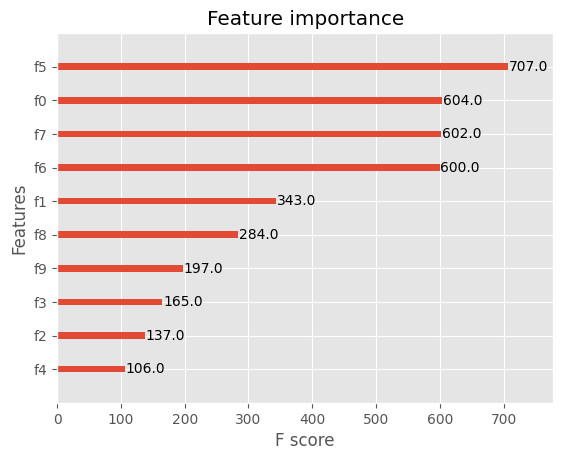

In [199]:
from xgboost import plot_importance
plot_importance(xg)
plt.show()

In [200]:
feature_importances = pd.DataFrame(zip(df.columns[1:], model.feature_importances_), columns = ['feature', 'score'])
feature_importances.sort_values(by = 'score', ascending = False)

,feature,score
7,num_calls,0.449264
9,y,0.279897
6,dur,0.159207
0,job,0.053127
4,day,0.034120
1,marital,0.012091
2,education_qual,0.004695
8,prev_outcome,0.003961
5,mon,0.001955
3,call_type,0.001684


In [201]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,4,1,4,1,5.0,1,261,1,4,1
1,44.0,8,3,2,1,5.0,1,151,1,4,1
2,33.0,11,1,2,1,5.0,1,76,1,4,1
3,47.0,12,1,3,1,5.0,1,92,1,4,1
4,33.0,7,3,3,1,5.0,1,198,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,8,1,4,3,17.0,4,643,3,4,0
45207,70.5,2,2,1,3,17.0,4,456,2,4,0
45208,70.5,2,1,2,3,17.0,4,643,5,1,0
45209,57.0,12,1,2,2,17.0,4,508,4,4,1
